# 🌍 NERC Digital Gathering - Environmental Data Hackathon — HadUK-Grid Notebook 

Welcome to the NERC Digital Gathering hackathon!  
This notebook contains the challenge briefs and starter code for you to explore weather, climate, and soil data available through CEDA and other sources. In the hackathon we invite you to use NERC data and to explore the CEDA archive. However, Cranfield hold the national soil map and so if your hack involves soil you can also use that dataset too.

In the hackathon, we are offering a chance to explore and interact with a range of meteorological ands other data in CEDA - NERC's Centre for Environmental Data Analysis. The datasets we are looking at include ECMWF, HAD and MIDAS. These data are in different formats and structures so you can explore these differences as well.

**MIDAS** (Met Office Integrated Data Archive System): This is a database of raw weather observations from land and marine surface stations, both in the UK and globally. It contains daily, hourly and sub-hourly measurements of various parameters like temperature, rainfall, sunshine, wind, cloud cover, and present weather codes. MIDAS data is station based timeseries data in CSV format.

**ECMWF** (European Centre for Medium-Range Weather Forecasts): This organisation produces weather forecasts and climate reanalyses. ECMWF data includes estimates of atmospheric parameters like air temperature, pressure, and wind at different altitudes, as well as surface parameters like rainfall, soil moisture content, ocean-wave height, and sea-surface temperature, for the entire globe. They also have ocean reanalysis and analysis systems like OCEAN5. ECMWF has regional gridded data in NetCDF format.

**HadUK-Grid** is a dataset of gridded climate variables for the UK derived from interpolated land surface observations. It focuses on climate variables like temperature, rainfall, sunshine, mean sea level pressure, wind speed, relative humidity, vapour pressure, days of snow lying, and days of ground frost, at daily, monthly, seasonal, and annual timescales. HADUK has regional gridded data in NetCDF format.

**Soils and Land Cover** In addition to the meteorological notebooks, we are also running a fourth notebook that allows some comparison of soil types and land cover in the county of Bedfordshire. Our challenge is to undertake some spatial analysis to establish any patterns between the datasets.

**This notebook sets some challenges using the HadUK-Grid data in CEDA.**

---

## ⚙️ Getting Started

1. **Load libraries**  
   The sorts of libraries you may need include `xarray`, `pandas`, `matplotlib`, `cartopy`, and `numpy`.  
   (Install with `pip install ...` if missing.)

2. **Accessing CEDA data with NetCDF**  
   Example:
   ```python
   import xarray as xr
   file_path = "/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/1km/monthly/tas/v20210715/hadukgrid_uk_1km_mon_tas_202001-202012.nc"
   ds = xr.open_dataset(file_path)
   print(ds)
   ```

3. **Notebook structure**  
   Each challenge is introduced in Markdown with background, tasks, and judging criteria.  
   Under each challenge you'll find starter code cells to help you begin.  

---

## ⚙️ Geographical focus
In this hackathon, we will focus the hacking geographically. You can choose to look at the UK as a whole, or focus in on Bedfordshire where we are located. Geographical coordinates for these areas are as follows:

* UK bounding box (roughly -10°W to 3°E, 49–61°N)
* Bedfordshire bounding box (roughly -0.89°W to 0.23°E, 51.95°N to 52.49°N)

## ⚙️ Useful links
Here are a few useful web addressses for CEDA data:
* CEDA Data home: https://data.ceda.ac.uk
* CEDA Help Doc home: https://help.ceda.ac.uk
* MIDAS User Guide: https://zenodo.org/records/7357335
* ECMWF website - https://www.ecmwf.int
* JASMIN Notebooks service help: https://help.jasmin.ac.uk/docs/interactive-computing/jasmin-notebooks-service/

---

# 📝 Challenges

**What you’ll do:**
- Explore the CEDA data archive to locate HadUK-Grid files
- Open and inspect NetCDF files with `xarray`
- Plot gridded data on the UK National Grid (OSGB)
- Work with **river-basin aggregations** to make time series and compare climates

> Tip: Run cells in order. If you’re on **JASMIN Notebooks**, the base environment should already include `xarray`, `matplotlib`, and `cartopy`.


In [ ]:
# Import required libraries for data processing, analysis, and visualisation
import os
from pathlib import Path
import re
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Import cartopy for mapping and geographical projections
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Configure pandas display options for better table formatting
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)


## ⚙️ Getting Started: Navigating the CEDA Archive

**What is CEDA?**  
The **Centre for Environmental Data Analysis (CEDA)** is the UK national data centre for environmental science (funded by UKRI/NERC). CEDA **curates, preserves, and serves** large climate and Earth-observation datasets and operates the **JASMIN** data-analysis platform where this archive is mounted.

**Top-level “data centre” folders on JASMIN**  
When you browse the filesystem, you’ll see historical data-centre roots that CEDA maintains:

- **`/badc`** — the British Atmospheric Data Centre archive (atmosphere & climate; many modern datasets live here)
- **`/neodc`** — the NERC Earth Observation Data Centre archive (satellite & EO holdings)

> You’ll mostly work under **`/badc`** in this hackathon. The **navigation pattern shown below applies to *both* roots** — once you learn it for one dataset, you can apply it to others (e.g., ERA5, UKCP18, CHESS, CRU).

---

### Key ideas (how datasets are organised)

- The main archive lives at **`/badc`** on ceda.
- **HadUK-Grid** lives under:  
  `/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/`
- Inside *HadUK-Grid* you’ll typically see:
  - **Product version** directories — e.g. `v1.3.1.ceda`
  - **Resolutions/Aggregations** — e.g. `5km`, `1km`, `12km`, `river`, `admin`, `country`, …
  - Within each variable (e.g. `rainfall`, `tasmax`, …):
    - **Time frequency** — `day`, `mon`, `ann`
    - **Data (release) version** — e.g. `v20250415`
  - Actual **NetCDF files** following a consistent naming pattern

A typical path for monthly **5 km rainfall** might look like:


---
### This navigation pattern works for other datasets too

While **names differ per collection**, you’ll find the same ideas elsewhere:

- A **collection root** under `/badc` or `/neodc` (e.g., `ecmwf-era5`, `ukcp18`, `cru`, `chess`, …)
- One or more **versions/releases**
- **Variables** grouped by **frequency**, sometimes by **resolution** or **region/aggregation**
- Files that advertise their **variable, product, domain, resolution, frequency, and time span** in the filename

Once you can find **HadUK-Grid rainfall**, you can use the *same recipe* to find, say, **other HadUK variables** (e.g., `tasmax`) or **other archives** (e.g., model projections, reanalyses, EO products).

---

We’ll now explore the tree **step-by-step** and also **auto-detect the latest versions** so the notebook remains robust and repeatable.


In [4]:
#  Explore /badc (top-level) ----
badc = Path("/badc")
print("Top-level collections under /badc (showing first 20):")
for p in sorted([d for d in badc.iterdir() if d.is_dir()])[:20]:
    print(" -", p.name)


Top-level collections under /badc (showing first 20):
 - .testing
 - .testing2
 - ARCHIVE_INFO
 - CDs
 - a-cure
 - abacus
 - accacia
 - accmip
 - acid-deposition
 - acid-pruf
 - acites
 - acruise
 - acse
 - acsis
 - acsoe
 - active
 - adriex
 - amazonica
 - amma
 - amps_antarctic


### Why you ran that
To develop a “map” in your head of the CEDA archive. You should recognise common collections like `ukmo-hadobs` (Hadley Centre observations) and `ecmwf-era5` (reanalysis).

Next, we’ll jump to the **HadUK-Grid** root and enumerate the **product versions** available.


In [5]:
#  Locate HadUK-Grid root and list product versions ----
haduk_root = Path("/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid")
if not haduk_root.exists():
    raise FileNotFoundError(f"HadUK-Grid root not found at: {haduk_root}")

versions = sorted([d for d in haduk_root.iterdir() if d.is_dir()])
print("HadUK-Grid product versions:")
for d in versions:
    print(" -", d.name)

# Helper: pick the newest-looking version 
ver_dir = versions[-1]
print("\nSelected product version:", ver_dir.name)


HadUK-Grid product versions:
 - v1.0.0.0
 - v1.0.1.0
 - v1.0.2.1
 - v1.0.3.0
 - v1.1.0.0
 - v1.2.0.ceda
 - v1.3.0.ceda
 - v1.3.1.ceda

Selected product version: v1.3.1.ceda


### What you should notice
- **Product versions** (e.g., `v1.3.1.ceda`) bundle a coherent set of variables/resolutions.
- Inside a version you’ll find **resolutions/aggregations** like `5km` (gridded) or `river` (catchment means).

We’ll explore the version directory to see what spatial aggregations are available.


In [6]:
#  List resolutions/aggregations in the selected product version ----
print(f"Contents of {ver_dir}:")
for p in sorted([d for d in ver_dir.iterdir() if d.is_dir()]):
    print(" -", p.name)


Contents of /badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.3.1.ceda:
 - 12km
 - 1km
 - 25km
 - 5km
 - 60km
 - country
 - region
 - river


### Guidance
- **Gridded resolutions**: `1km`, `5km`, `12km`, `60km`, etc.
- **Aggregations by region**: `river` (23 basins), `admin` (administrative), `country`, etc.

For the challenges, we’ll start with **5km gridded rainfall** (monthly), and later use the **river** aggregation.


In [16]:
# Explore one resolution: 5km ----
res_dir = ver_dir / "5km"
if not res_dir.exists():
    raise FileNotFoundError(f"Resolution directory not found: {res_dir}")

vars_available = sorted([d.name for d in res_dir.iterdir() if d.is_dir()])
print("Variables available at 5km resolution:")
for v in vars_available:
    print(" -", v)


Variables available at 5km resolution:
 - groundfrost
 - hurs
 - psl
 - pv
 - rainfall
 - sfcWind
 - snowLying
 - sun
 - tas
 - tasmax
 - tasmin


### Next step
Pick a **variable** to work with. We’ll use `rainfall` for the core exercises.

Inside a variable directory you’ll see **frequencies** (e.g. `mon`, `day`, `ann`) and, within those, a **data version** like `v20250415`.


In [17]:
#  Drill down into rainfall / monthly, and auto-detect latest data version ----
var = "rainfall"
var_dir = res_dir / var
if not var_dir.exists():
    raise FileNotFoundError(f"Variable directory not found: {var_dir}")

freq = "mon"
freq_dir = var_dir / freq
if not freq_dir.exists():
    raise FileNotFoundError(f"Frequency directory not found: {freq_dir}")

# data subversion folders like v20250415
data_versions = sorted([d for d in freq_dir.iterdir() if d.is_dir()])
if not data_versions:
    raise FileNotFoundError(f"No data versions inside {freq_dir}")
data_ver_dir = data_versions[-1]

print("Selected data version:", data_ver_dir.name)

# List a few files
files = sorted(data_ver_dir.glob("*.nc"))
print(f"Found {len(files)} NetCDF files (showing up to 10):")
for f in files[:10]:
    print(" -", f.name)


Selected data version: v20250415
Found 189 NetCDF files (showing up to 10):
 - rainfall_hadukgrid_uk_5km_mon_183601-183612.nc
 - rainfall_hadukgrid_uk_5km_mon_183701-183712.nc
 - rainfall_hadukgrid_uk_5km_mon_183801-183812.nc
 - rainfall_hadukgrid_uk_5km_mon_183901-183912.nc
 - rainfall_hadukgrid_uk_5km_mon_184001-184012.nc
 - rainfall_hadukgrid_uk_5km_mon_184101-184112.nc
 - rainfall_hadukgrid_uk_5km_mon_184201-184212.nc
 - rainfall_hadukgrid_uk_5km_mon_184301-184312.nc
 - rainfall_hadukgrid_uk_5km_mon_184401-184412.nc
 - rainfall_hadukgrid_uk_5km_mon_184501-184512.nc


### File naming pattern 
Example:
``rainfall_hadukgrid_uk_5km_mon_202401-202412.nc``
Meaning:
- **rainfall** — variable
- **hadukgrid** — product
- **uk** — domain
- **5km** — grid resolution
- **mon** — monthly
- **202401–202412** — time span (YYYYMM–YYYYMM)

You now have a **repeatable recipe** to find any HadUK-Grid variable/frequency/resolution.


# 🧩 Challenges

We’ll keep using **5 km monthly rainfall** for consistency, then branch into **river basins** for aggregated analysis (feel free to change data resolution above) 


## Challenge 1 — Open a HadUK-Grid NetCDF and Inspect It

**Background**  
HadUK-Grid data are served as NetCDF with rich metadata. It’s essential to check dimensions, coordinates, and attributes before analysis.

**Your Task**
- Select a **5 km monthly rainfall** file.
- Open it with `xarray.open_dataset`.
- Display the dataset to review dimensions, variables, coordinates, and attributes.

**Success Criteria**
- The dataset opens without error.
- You can identify the rainfall variable, its units, and grid coordinate names.


In [29]:
# ---- Challenge 1: Open and inspect a sample file ----
ds = xr.open_dataset(files[15])
ds

<xarray.Dataset> Size: 6MB
Dimensions:                       (time: 12, projection_y_coordinate: 290,
                                   projection_x_coordinate: 180, bnds: 2)
Coordinates:
  * time                          (time) datetime64[ns] 96B 1851-01-16 ... 18...
  * projection_y_coordinate       (projection_y_coordinate) float64 2kB -1.97...
  * projection_x_coordinate       (projection_x_coordinate) float64 1kB -1.97...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 418kB ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 418kB ...
    month_number                  (time) int64 96B ...
    season_year                   (time) int64 96B ...
Dimensions without coordinates: bnds
Data variables:
    rainfall                      (time, projection_y_coordinate, projection_x_coordinate) float64 5MB ...
    transverse_mercator           int32 4B ...
    time_bnds                     (time, bnds) datetime64[ns] 192B ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 5kB ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 3kB ...
Attributes:
    comment:        Monthly resolution gridded climate observations
    creation_date:  2025-04-15T08:26:01
    frequency:      mon
    institution:    Met Office
    references:     doi: 10.1002/gdj3.78
    short_name:     monthly_rainfall
    source:         HadUK-Grid_v1.3.1.0
    title:          Gridded surface climate observations data for the UK
    version:        v20250415
    Conventions:    CF-1.7

HadUK-Grid data are stored in **NetCDF** format, which is the standard for climate data. When you open a file with `xarray.open_dataset`, you get a `xarray.Dataset` object that summarises the file’s structure.

A `Dataset` contains:

- **Dimensions**  
  These describe the axes of the data.  
  Example here:  
  - `time` (12 months in the file)  
  - `projection_y_coordinate` and `projection_x_coordinate` (grid rows and columns in OSGB projection)  
  - `bnds` (bounds arrays used for time and spatial edges)

- **Coordinates**  
  These link dimensions to real-world meaning.  
  - `time` → actual datetime values  
  - `projection_x_coordinate` / `projection_y_coordinate` → grid locations (in meters in OSGB projection)  
  - `latitude` and `longitude` → derived geographic coords for each grid point  
  - `month_number`, `season_year` → climatological helper coords

- **Data variables**  
  The actual climate fields and auxiliary information.  
  - `rainfall` → the main data array (time × y × x)  
  - `time_bnds`, `projection_x_coordinate_bnds`, `projection_y_coordinate_bnds` → bounds info for averaging  
  - `transverse_mercator` → projection definition

- **Attributes**  
  Metadata describing the dataset:  
  - `title`, `institution`, `source`, `frequency`, `creation_date`, etc.  
  - These are useful for provenance and citation (e.g., `doi:10.1002/gdj3.78`).

## Challenge 2 — Plot a UK Map (OSGB Projection)

**Background**  
HadUK-Grid gridded data use the **UK National Grid (OSGB)**. With Cartopy you can plot directly in OSGB.

**Your Task**
- Select a **single month** from the dataset (e.g., the first available in the file).
- Plot a map using `pcolormesh` in **OSGB**.
- Add coastlines, borders, a title, and a colorbar label.

**Success Criteria**
- A clear UK map of monthly rainfall for your chosen month in mm.


In [30]:
# ---- Challenge 2: Map a single month in OSGB ----
# Pick the first time in the file
time0 = ds["time"].values[0]
da = ds["rainfall"].sel(time=time0).squeeze(drop=True)

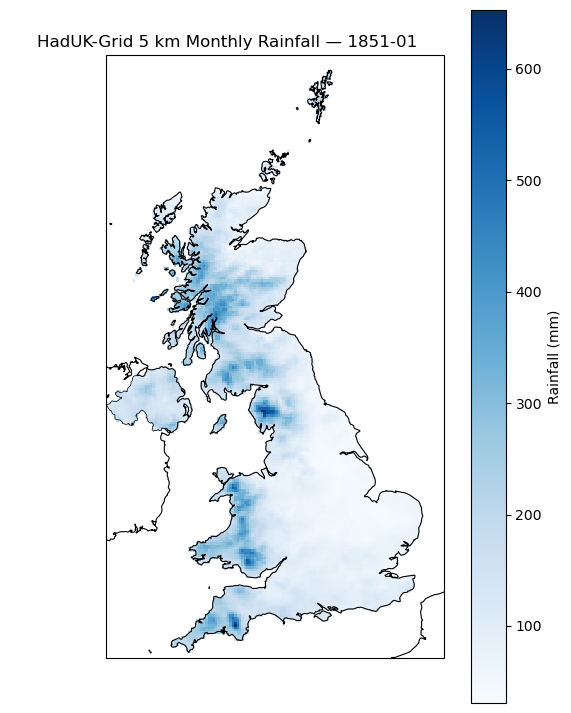

In [31]:
osgb = ccrs.OSGB(approx=False)
fig, ax = plt.subplots(figsize=(7, 9), subplot_kw={"projection": osgb})

p = da.plot.pcolormesh(
    ax=ax,
    x="projection_x_coordinate", y="projection_y_coordinate",
    transform=osgb,  # data native
    cmap="Blues",
    cbar_kwargs={"label": "Rainfall (mm)"},
    add_colorbar=True, add_labels=False,
)

# UK extents in OSGB (tweak if needed)
ax.set_xlim(-200_000, 700_000)
ax.set_ylim(0, 1_250_000)

ax.coastlines(resolution="10m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

ax.set_title(f"HadUK-Grid 5 km Monthly Rainfall — {np.datetime_as_string(time0, unit='M')}")
plt.show()

## Challenge 3 — Explore the River-Basin Aggregation Product

**Background**  
HadUK-Grid also provides **river-basin** averages for quick catchment-scale analysis (23 regions).

**Your Task**
- Navigate to the **river** aggregation for `rainfall` at monthly frequency.
- Auto-select the latest data version and open the **multi-year** file.
- Inspect dimensions/attributes and list region IDs and names.

**Success Criteria**
- You can print a clean ID → name mapping for all basins.
- The dataset is ready for time-series analysis.


In [33]:
# ---- Challenge 3: Open river-basin monthly rainfall ----
river_dir = ver_dir / "river" / "rainfall" / "mon"
river_data_versions = sorted([d for d in river_dir.iterdir() if d.is_dir()])
river_ver_dir = river_data_versions[-1]
print("Selected river data version:", river_ver_dir.name)
river_files = sorted(river_ver_dir.glob("rainfall_hadukgrid_uk_river_mon_*.nc"))
river_file = river_files[-1]
print("Opening river file:", river_file.name)


ds_riv = xr.open_dataset(river_file)
ds_riv


Selected river data version: v20250415
Opening river file: rainfall_hadukgrid_uk_river_mon_183601-202412.nc


<xarray.Dataset> Size: 527kB
Dimensions:        (time: 2268, region: 23, bnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 18kB 1836-01-16 ... 2024-12-16
  * region         (region) int64 184B 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23
    geo_region     (region) |S21 483B ...
    calendar_year  (time) int64 18kB ...
    month_number   (time) int64 18kB ...
    season_year    (time) int64 18kB ...
Dimensions without coordinates: bnds
Data variables:
    rainfall       (time, region) float64 417kB ...
    time_bnds      (time, bnds) datetime64[ns] 36kB ...
Attributes:
    comment:        Monthly resolution gridded climate observations
    creation_date:  2025-04-16T08:23:56
    frequency:      mon
    institution:    Met Office
    references:     doi: 10.1002/gdj3.78
    short_name:     monthly_rainfall
    source:         HadUK-Grid_v1.3.1.0
    title:          Gridded surface climate observations data for the UK
    version:        v20250415
    Conventions:    CF-1.7

In [34]:
# Decode region names (handle fixed-length strings)
region_ids = ds_riv["region"].values
region_names = np.char.strip(ds_riv["geo_region"].astype(str).values)

print("River regions (ID → name):")
for rid, name in zip(region_ids, region_names):
    # ensure clean str
    name = name.decode() if isinstance(name, (bytes, np.bytes_)) else str(name)
    print(f"{int(rid):2d} → {name}")


River regions (ID → name):
 1 → Anglian
 2 → Argyll
 3 → Clyde
 4 → Dee
 5 → Forth
 6 → Humber
 7 → Neagh Bann
 8 → North East Scotland
 9 → North Eastern Ireland
10 → North Highland
11 → North West England
12 → North Western Ireland
13 → Northumbria
14 → Orkney and Shetland
15 → Severn
16 → Solway
17 → South East England
18 → South West England
19 → Tay
20 → Thames
21 → Tweed
22 → West Highland
23 → Western Wales


## Challenge 4 — Build a Monthly Time Series for a Basin

**Background**  
Basin-aggregated monthly series allow you to see variability and trends without gridded complexities.

**Your Task**
- Write a helper to select a basin by (partial) name.
- Extract the rainfall series and plot the full record.
- Compute and plot the **1991–2020 monthly climatology**.

**Success Criteria**
- Two figures: (1) full monthly series; (2) a 12-month climatology.


In [37]:
# ---- Challenge 4: Basin selector + plots ----
def select_region_id_by_name(ds, name_substring: str) -> tuple[int, str]:
    """Return (region_id, clean_name) for the first case-insensitive match (exact or partial)."""
    names_raw = ds["geo_region"].astype(str).values
    names = np.array([
        n.decode() if isinstance(n, (bytes, np.bytes_)) else str(n)
        for n in names_raw
    ])
    target = name_substring.lower()
    # Exact match first
    exact = np.where(np.char.lower(names) == target)[0]
    if exact.size:
        idx = int(exact[0])
    else:
        # Partial
        part = np.where(np.char.find(np.char.lower(names), target) >= 0)[0]
        if not part.size:
            raise ValueError(f"No region matching '{name_substring}'. Available: {', '.join(names)}")
        idx = int(part[0])
    rid = int(ds["region"].values[idx])
    return rid, names[idx]



############################
region_id, region_name = select_region_id_by_name(ds_riv, "Thames")  # change here for the desired basin 
print(f"Selected region: {region_id} → {region_name}")

da_riv = ds_riv["rainfall"].sel(region=region_id)  # (time,)


Selected region: 20 → Thames               


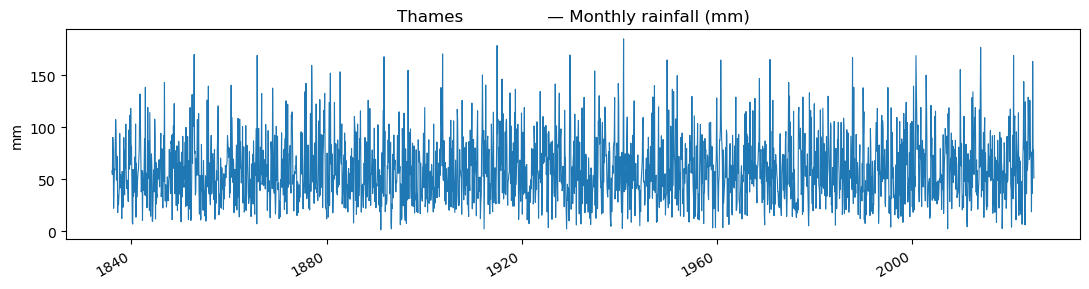

In [38]:
# Full monthly time series
ax = da_riv.to_pandas().plot(figsize=(11, 3), lw=0.8)
ax.set_title(f"{region_name} — Monthly rainfall (mm)")
ax.set_ylabel("mm"); ax.set_xlabel("")
plt.tight_layout(); plt.show()


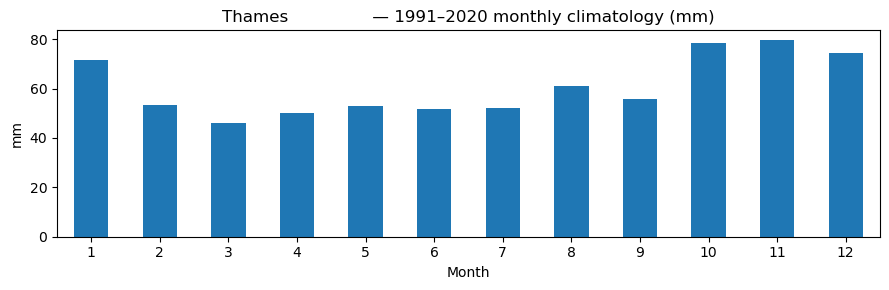

In [39]:
# 1991–2020 monthly climatology
clim = da_riv.sel(time=slice("1991-01","2020-12")).groupby("time.month").mean()
ax = clim.to_pandas().plot(kind="bar", figsize=(9, 3), rot=0)
ax.set_title(f"{region_name} — 1991–2020 monthly climatology (mm)")
ax.set_ylabel("mm"); ax.set_xlabel("Month")
plt.tight_layout(); plt.show()


## Challenge 5 — Compare River Basins: 1961–1990 vs 1991–2020

**Background**  
How does a recent climate reference period compare to a historical one? We’ll compare **mean rainfall** across all river basins between **1961–1990** and **1991–2020**.

**Your Task**
- Compute mean rainfall for each river basin in both periods.
- Calculate **% change** and rank river basins.
- Visualise the changes with a horizontal bar chart.

**Success Criteria**
- A sorted table and a bar chart showing % change by basin.


In [ ]:
# ---- Challenge 5: River Basin-wise comparison of periods ----
# Monthly means in each period (averaged over months)
old = ds_riv["rainfall"].sel(time=slice("1961-01","1990-12")).groupby("time.month").mean()
new = ds_riv["rainfall"].sel(time=slice("1991-01","2020-12")).groupby("time.month").mean()

pct_change = 100 * (new.mean("month") - old.mean("month")) / old.mean("month")  # (region,)

# Clean region names again
region_names = np.array([
    n.decode() if isinstance(n, (bytes, np.bytes_)) else str(n)
    for n in ds_riv["geo_region"].astype(str).values
])

tbl = pd.DataFrame({
    "region": region_names,
    "pct_change": pct_change.values
}).sort_values("pct_change", ascending=False)

print("Top 10 River basins by % change (1991–2020 vs 1961–1990):")
display(tbl.head(10))

print("\nBottom 10 River basins by % change:")
display(tbl.tail(10))


Top 10 basins by % change (1991–2020 vs 1961–1990):


,region,pct_change
15,Solway,10.548560
4,Forth,10.510330
18,Tay,10.476770
1,Argyll,10.383717
20,Tweed,10.382572
2,Clyde,9.748549
11,North Western Ireland,7.749436
9,North Highland,7.640232
14,Severn,7.124383
21,West Highland,7.115461



Bottom 10 basins by % change:


,region,pct_change
7,North East Scotland,6.320413
3,Dee,5.898499
10,North West England,5.714272
22,Western Wales,5.610663
0,Anglian,5.499401
8,North Eastern Ireland,5.223284
6,Neagh Bann,4.950011
19,Thames,4.731356
5,Humber,4.722204
13,Orkney and Shetland,3.162778


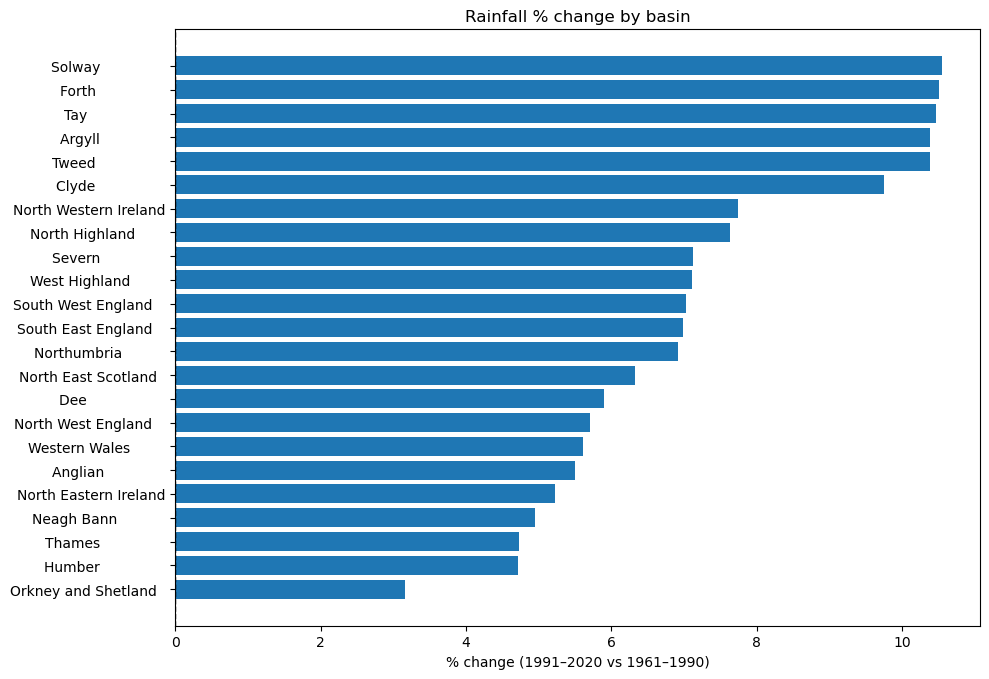

In [ ]:
# Bar chart of % changes for all River basins
tbl_plot = tbl.sort_values("pct_change")
plt.figure(figsize=(10, max(4, len(tbl_plot)*0.3)))
plt.barh(tbl_plot["region"].astype(str), tbl_plot["pct_change"])
plt.axvline(0, ls="--", lw=1, c="k")
plt.xlabel("% change (1991–2020 vs 1961–1990)")
plt.title("Rainfall % change by basin")
plt.tight_layout()
plt.show()


# ✅ Wrap-Up

You’ve:
- Navigated CEDA/JASMIN to find HadUK-Grid data
- Opened and plotted **5 km gridded** rainfall in OSGB
- Worked with **river-basin** aggregations to make time series and compare climates across periods

**Next ideas:**
- Repeat analyses for **temperature** or **sunshine** variables
- Compute **seasonal** means (e.g. DJF/JJA) and map anomalies
- Export summary tables to CSV for sharing

If you move this notebook to a different environment, make sure paths are valid (or parameterise them), and that `cartopy` and `proj` are available.
